In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

plt.rcParams["font.family"] = "helvetica"
plt.rcParams["font.weight"] = "bold"

In [2]:
data_date = 20221019

df = pd.read_csv(f'./data/bfo_df_master_{data_date}.csv')

lit_df = df[~df['doi'].isin(['Sutter-Fella Lab', 'Sutter-Fella Lab -- suggested'])]

In [3]:
chem_combs = [
    'EG + CA + NA',
    '2ME',
    '2ME + CA',
    '2ME + AA + AAnhyd',
    '2ME + AA',
    '2ME + AAnhyd'
]



omit_conds = [
    'Mixing time',
    'Mixing temperature',
    'Precursor concentration',
    'Bi:Fe ratio',
    'Annealing conditions',
    'Precursors and reagents'
]

In [4]:
chem_combs_nums = [12, 21, 27, 27, 38, 77]

omit_conds_nums = [83, 69, 54, 40, 2, 2]


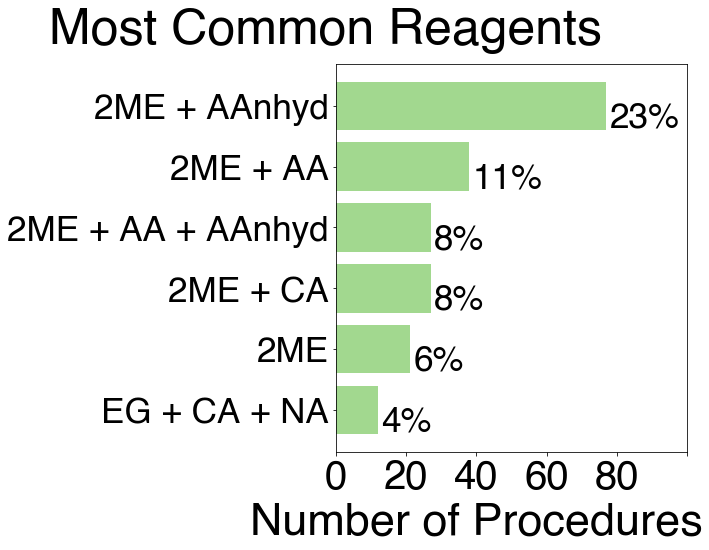

In [33]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 8))

ax1.barh(chem_combs, chem_combs_nums, align='center', color='#A2D88F')
#ax2.barh(omit_conds, omit_conds_nums, align='center', color='#2ca1c4')


ax1.set_xticklabels([0, 20, 40, 60, 80], fontsize=15)
ax1.set_yticklabels(chem_combs, fontsize=35, weight='bold')
ax1.set_xlim(0, 100)
ax1.text(78, 4.65, "23%", fontsize=35, bbox=dict(color='white', alpha=0))
ax1.text(39, 3.65, "11%", fontsize=35, bbox=dict(color='white', alpha=0))
ax1.text(28, 2.65, "8%", fontsize=35, bbox=dict(color='white', alpha=0))
ax1.text(28, 1.65, "8%", fontsize=35, bbox=dict(color='white', alpha=0))
ax1.text(22, 0.65, "6%", fontsize=35, bbox=dict(color='white', alpha=0))
ax1.text(13, -0.35, "4%", fontsize=35, bbox=dict(color='white', alpha=0))


# ax2.set_xticklabels([0, 20, 40, 60, 80], fontsize=15)
# ax2.set_yticklabels(omit_conds, rotation=0, va='center', fontsize=15)
# ax2.set_xlim(0, 100)
# ax2.text(3, 4.65, "1%", fontsize=15, bbox=dict(color='white', alpha=0))
# ax2.text(3, 3.65, "1%", fontsize=15, bbox=dict(color='white', alpha=0))
# ax2.text(41, 2.65, "22%", fontsize=15, bbox=dict(color='white', alpha=0))
# ax2.text(55, 1.65, "30%", fontsize=15, bbox=dict(color='white', alpha=0))
# ax2.text(70, 0.65, "39%", fontsize=15, bbox=dict(color='white', alpha=0))
# ax2.text(84, -0.35, "47%", fontsize=15, bbox=dict(color='white', alpha=0))

ax1.set_title("Most Common Reagents", fontsize=50, pad=20, x=-0.03)
# ax2.set_title("Most Frequently Omitted Information", fontsize=20)0
plt.xticks(fontsize=40)

ax1.set_xlabel("Number of Procedures", fontsize=45, x=0.4)

fig.tight_layout(pad=2)
plt.savefig('/Users/kevcruse96/Desktop/D2S2/BiFeO3/tm_paper/figures/202302_prec_summary.png', bbox_inches="tight")

In [6]:
drying = lit_df['dry_degC'].dropna()
prebake = pd.concat([lit_df['layer_prebake_degC'].dropna(), lit_df['final_prebake_degC'].dropna()])
annealing = pd.concat([lit_df['layer_annealing_degC'].dropna(), lit_df['final_annealing_degC'].dropna()])

In [7]:
print(annealing.std()/annealing.mean())
stop

0.12156724349267439


NameError: name 'stop' is not defined

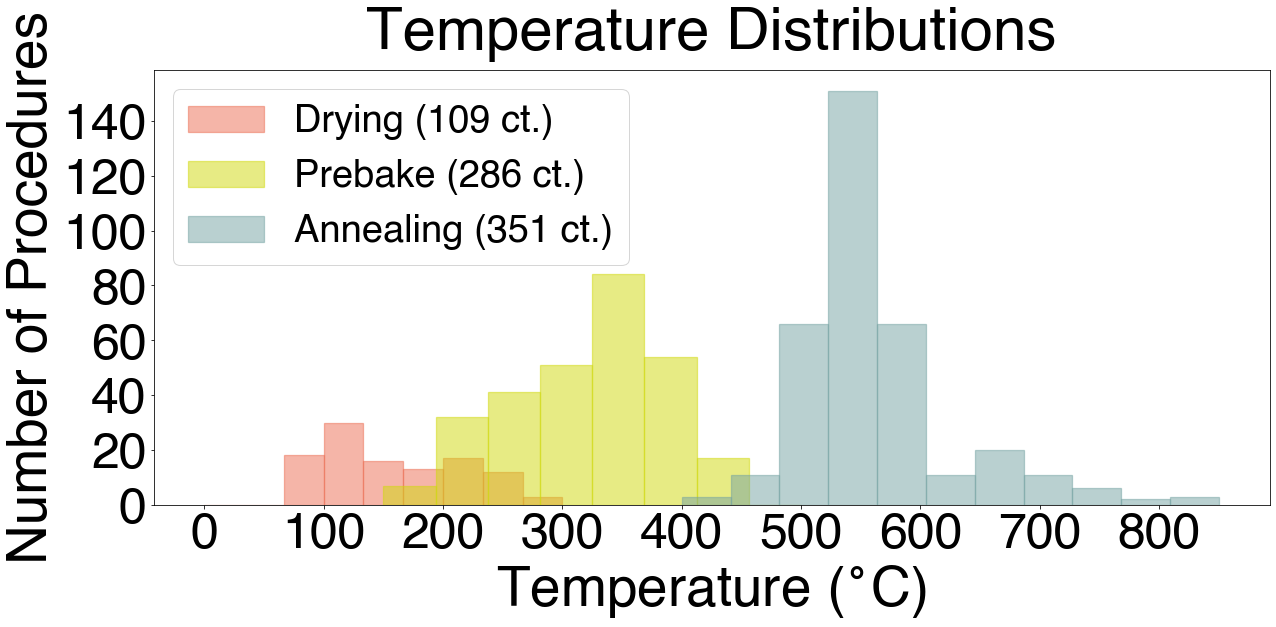

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

dry_hist = ax.hist(
    drying,
    np.linspace(0, 300, 10), 
    alpha=0.5, 
    color='#EC6D52', 
    edgecolor='#EC6D52', 
    linewidth=1.3,
    label=f'Drying ({len(drying)} ct.)'
)

prebake_hist = ax.hist(
    prebake, 
    np.linspace(150, 500, 9), 
    alpha=0.5, 
    color='#D0D90B',
    edgecolor='#D0D90B', 
    linewidth=1.3,
    label=f'Prebake ({len(prebake)} ct.)'
)

anneal_hist = ax.hist(
    annealing, 
    np.linspace(400, 850,12), 
    alpha=0.5, 
    color='#74A3A2',
    edgecolor='#74A3A2', 
    linewidth=1.3,
    label=f'Annealing ({len(annealing)} ct.)'
)

ax.set_xlabel('Temperature ($^{\circ}$C)', fontsize=55)
ax.set_ylabel('Number of Procedures', fontsize=55)

ax.set_title("Temperature Distributions", fontsize=60, pad=20)

plt.yticks(fontsize=50)
plt.xticks(np.arange(0, 900, 100), fontsize=50)

plt.legend(loc="upper left", fontsize=38)

fig.savefig('/Users/kevcruse96/Desktop/D2S2/BiFeO3/tm_paper/figures/temp_dists.png', bbox_inches="tight")

In [ ]:
print(drying)